In [9]:
import pandas as pd

df = pd.read_csv(r"C:\Users\User\Desktop\gameandgrade.csv")


In [11]:
print(df.head())

   Sex  School Code  Playing Years  Playing Often  Playing Hours  \
0    0            1              1              2              1   
1    1            1              1              3              1   
2    0            1              0              0              0   
3    0            1              3              5              1   
4    1            1              1              1              2   

   Playing Games  Parent Revenue  Father Education  Mother Education  Grade  
0              1               4                 4                 5  77.50  
1              1               1                 3                 3  83.00  
2              0               1                 3                 3  80.00  
3              1               2                 2                 3  45.00  
4              1               1                 3                 4  85.00  


In [13]:
print(df.columns)


Index(['Sex', 'School Code', 'Playing Years', 'Playing Often', 'Playing Hours',
       'Playing Games', 'Parent Revenue', 'Father Education',
       'Mother Education', 'Grade'],
      dtype='object')


In [15]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               770 non-null    int64 
 1   School Code       770 non-null    int64 
 2   Playing Years     770 non-null    int64 
 3   Playing Often     770 non-null    int64 
 4   Playing Hours     770 non-null    int64 
 5   Playing Games     770 non-null    int64 
 6   Parent Revenue    770 non-null    int64 
 7   Father Education  770 non-null    int64 
 8   Mother Education  770 non-null    int64 
 9   Grade             770 non-null    object
dtypes: int64(9), object(1)
memory usage: 60.3+ KB
None


In [17]:
print(df.isna().sum()) 


Sex                 0
School Code         0
Playing Years       0
Playing Often       0
Playing Hours       0
Playing Games       0
Parent Revenue      0
Father Education    0
Mother Education    0
Grade               0
dtype: int64


In [19]:
print(df.duplicated().sum())  


16


In [47]:
df = df.drop_duplicates()


In [51]:
print(df["Playing Games"].value_counts())


Playing Games
1    542
0    211
2      1
Name: count, dtype: int64


In [53]:
print(df.head())


   Sex  School Code  Playing Years  Playing Often  Playing Hours  \
0    0            1              1              2              1   
1    1            1              1              3              1   
2    0            1              0              0              0   
3    0            1              3              5              1   
4    1            1              1              1              2   

   Playing Games  Parent Revenue  Father Education  Mother Education  Grade  
0              1               4                 4                 5   77.5  
1              1               1                 3                 3   83.0  
2              0               1                 3                 3   80.0  
3              1               2                 2                 3   45.0  
4              1               1                 3                 4   85.0  


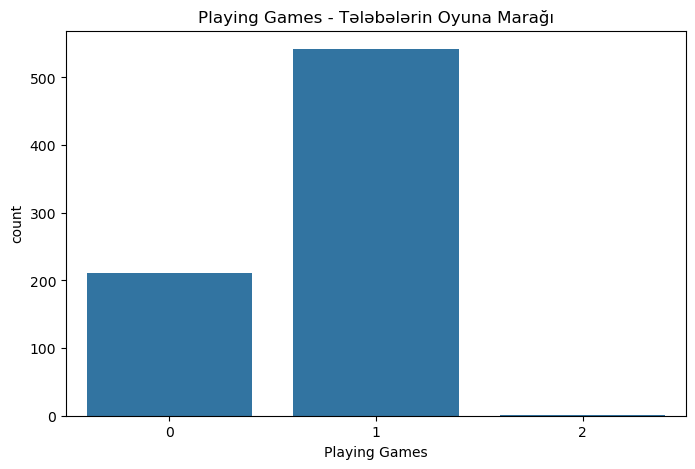

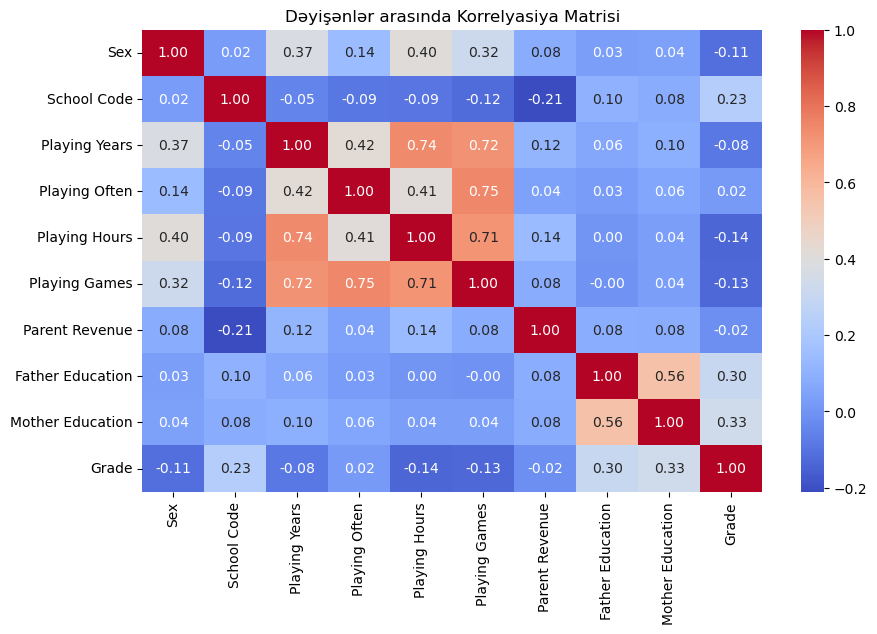

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.countplot(x=df["Playing Games"])
plt.title("Playing Games - Tələbələrin Oyuna Marağı")
plt.show()
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Dəyişənlər arasında Korrelyasiya Matrisi")
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["Playing Games"]) 
y = df["Playing Games"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Məlumatlar hazırdır!")



✅ Məlumatlar hazırdır!


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Modelin dəqiqliyi: {accuracy:.2f}")

print(classification_report(y_test, y_pred))


✅ Modelin dəqiqliyi: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00       108

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151



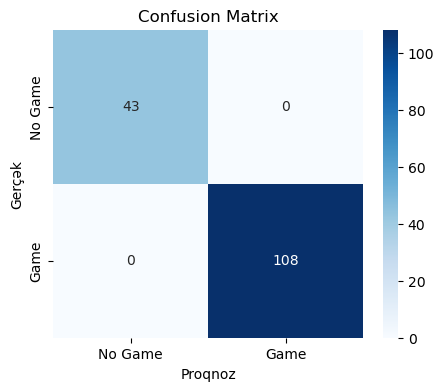

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Game', 'Game'], yticklabels=['No Game', 'Game'])
plt.xlabel("Proqnoz")
plt.ylabel("Gerçək")
plt.title("Confusion Matrix")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_11288\2215633991.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients["Impact"], y=coefficients.index, palette="coolwarm")


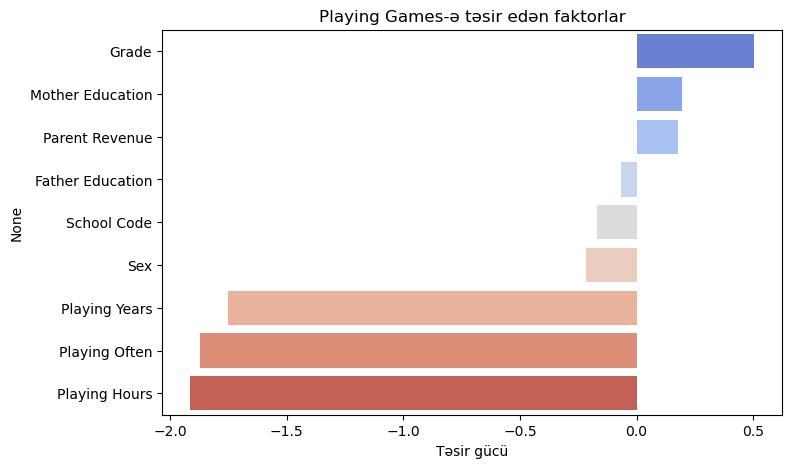

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = df.drop("Playing Games", axis=1).columns 

coefficients = pd.DataFrame(model.coef_[0], index=feature_names, columns=["Impact"])
coefficients = coefficients.sort_values(by="Impact", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=coefficients["Impact"], y=coefficients.index, palette="coolwarm")
plt.xlabel("Təsir gücü")
plt.title("Playing Games-ə təsir edən faktorlar")
plt.show()


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["Playing Often"])  
y = df["Playing Often"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Məlumatlar hazırdır!")


✅ Məlumatlar hazırdır!


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=["Playing Often"])  
y = df["Playing Often"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Modelin dəqiqliyi: {accuracy:.2f}")

print(classification_report(y_test, y_pred, zero_division=1))


✅ Modelin dəqiqliyi: 0.52
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.40      0.52      0.45        23
           2       0.00      0.00      0.00        14
           3       0.24      0.17      0.20        23
           4       1.00      0.00      0.00        18
           5       0.34      0.65      0.45        31

    accuracy                           0.52       151
   macro avg       0.50      0.39      0.35       151
weighted avg       0.56      0.52      0.47       151



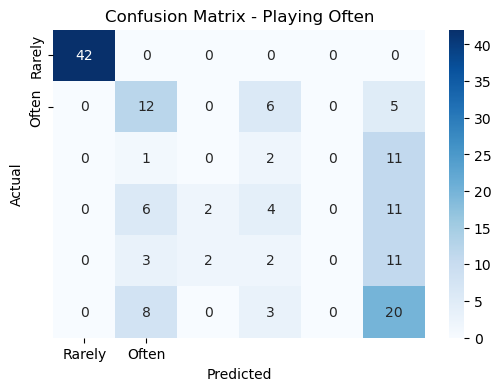

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Rarely", "Often"], yticklabels=["Rarely", "Often"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Playing Often")
plt.show()


In [83]:
import pandas as pd

feature_names = df.drop(columns=["Playing Often"]).columns

coefficients = pd.DataFrame(model.coef_[0], index=feature_names, columns=["Impact"])

coefficients = coefficients.sort_values(by="Impact", ascending=False)

print(coefficients)


                    Impact
School Code       0.109458
Grade             0.058743
Parent Revenue    0.039562
Father Education  0.004717
Mother Education -0.027822
Sex              -0.164705
Playing Years    -1.120983
Playing Hours    -1.170534
Playing Games    -2.797057


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["Playing Hours"])  
y = df["Playing Hours"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Məlumatlar hazırdır!")


✅ Məlumatlar hazırdır!


In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Modelin keyfiyyəti:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


✅ Modelin keyfiyyəti:
MAE (Mean Absolute Error): 0.53
MSE (Mean Squared Error): 0.54
R² Score: 0.69


In [91]:
import pandas as pd

feature_names = df.drop(columns=["Playing Hours"]).columns 

coefficients = pd.DataFrame(model.coef_.reshape(-1, 1), index=feature_names, columns=["Impact"])

coefficients = coefficients.sort_values(by="Impact", ascending=False)

print(coefficients)



                    Impact
Playing Games     0.622364
Playing Years     0.538096
Sex               0.159853
Parent Revenue    0.048978
Grade             0.000926
Father Education -0.018738
School Code      -0.019663
Mother Education -0.028698
Playing Often    -0.147829
